Introduction:

COVID-19 is a disease that emerged in December 2019. It is passed from person to person but can its spread be prevented with good hygiene, wearing a mask, and physical distancing. I wish no one had to suffer from the consequences of contracting this disease but as we have seen there is a very real possibility of severe consequences, the worst being death. In this project I want to focus on who is the most likely to contract the illness and who it affects the most. Maybe with this there can be some solid analysis that helps people realize the impact and importance of this disease on people around Maryland.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import re
import datetime
from datetime import datetime
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression

In [104]:
# Obtaining the data and showing it's content
cases_data_set = pd.read_csv('MD_COVID-19_-_Cases_by_Age_Distribution.csv')
# Dropping the days that are not in both data sets to have an accurate comparison
cases_data_set.drop(cases_data_set.index[0:10], inplace=True)
# removing outliers and strange data that will interfere
cases_data_set = cases_data_set[cases_data_set['Age_0_to_9'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_10_to_19'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_20_to_29'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_30_to_39'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_40_to_49'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_50_to_59'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_60_to_69'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_70_to_79'].notna()]
cases_data_set = cases_data_set[cases_data_set['Age_80plus'].notna()]
cases_data_set.drop(cases_data_set.tail(2).index,inplace=True)
cases_data_set.drop(columns=['OBJECTID','Age_Unknown'], inplace=True)
cases_data_set.drop([606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628], inplace=True)
cases_data_set = cases_data_set.reset_index(drop=True)
for index, row in cases_data_set.iterrows():
    row['DATE'] = row['DATE'][:-12]
    row['DATE'] = datetime.strptime(row['DATE'], '%m/%d/%Y')
    cases_data_set.loc[index, ['DATE']] = row['DATE']
cases_data_set.head()

,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus
0,2020-04-08 00:00:00,27,109,625,968,1015,1135,833,550,267
1,2020-04-09 00:00:00,33,127,701,1076,1145,1282,913,600,308
2,2020-04-10 00:00:00,36,146,772,1205,1281,1421,1051,685,371
3,2020-04-11 00:00:00,45,162,855,1317,1413,1565,1141,757,439
4,2020-04-12 00:00:00,52,172,906,1390,1504,1675,1212,816,498


In [103]:
# Obtaining the data and showing it's content
death_data_set = pd.read_csv('MD_COVID-19_-_Confirmed_Deaths_by_Age_Distribution.csv')
death_data_set.drop(columns=['OBJECTID','Age_Unknown'], inplace=True)
# removing outliers and strange data that will interfere
death_data_set = death_data_set[death_data_set['Age_0_to_9'].notna()]
death_data_set = death_data_set[death_data_set['Age_10_to_19'].notna()]
death_data_set = death_data_set[death_data_set['Age_20_to_29'].notna()]
death_data_set = death_data_set[death_data_set['Age_30_to_39'].notna()]
death_data_set = death_data_set[death_data_set['Age_40_to_49'].notna()]
death_data_set = death_data_set[death_data_set['Age_50_to_59'].notna()]
death_data_set = death_data_set[death_data_set['Age_60_to_69'].notna()]
death_data_set = death_data_set[death_data_set['Age_70_to_79'].notna()]
death_data_set = death_data_set[death_data_set['Age_80plus'].notna()]
death_data_set.drop(death_data_set.tail(2).index,inplace=True)
death_data_set.drop([606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628], inplace=True)
death_data_set = death_data_set.reset_index(drop=True)
for index, row in death_data_set.iterrows():
    row['DATE'] = row['DATE'][:-5]
    row['DATE'] = datetime.strptime(row['DATE'], '%m/%d/%Y')
    death_data_set.loc[index, ['DATE']] = row['DATE']
death_data_set.head()

,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus
0,2020-04-08 00:00:00,0.0,0.0,0.0,4.0,4.0,16.0,26.0,39.0,35.0
1,2020-04-09 00:00:00,0.0,0.0,0.0,4.0,4.0,16.0,28.0,43.0,43.0
2,2020-04-10 00:00:00,0.0,0.0,0.0,5.0,5.0,20.0,32.0,51.0,58.0
3,2020-04-11 00:00:00,0.0,0.0,1.0,8.0,5.0,22.0,42.0,57.0,71.0
4,2020-04-12 00:00:00,0.0,0.0,1.0,9.0,5.0,25.0,51.0,65.0,79.0


Now that we have our two data sets we can begin to do work on them. The first thing that I am going to do with these data sets is begin plotting them over the dates that are given.

<AxesSubplot:title={'center':'Cases per age group over months'}, xlabel='Date', ylabel='Cases'>

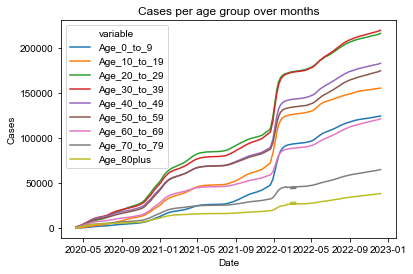

In [6]:
fg = sns.lineplot(x = 'DATE', y = 'value', hue='variable', data = pd.melt(cases_data_set, 'DATE'))
fg.set(xlabel ="Date", ylabel = "Cases", title ='Cases per age group over months')
sns.set(rc={'figure.figsize':(11.7,8.27)})
fg

<AxesSubplot:title={'center':'Deaths per age group over months'}, xlabel='Date', ylabel='Deaths'>

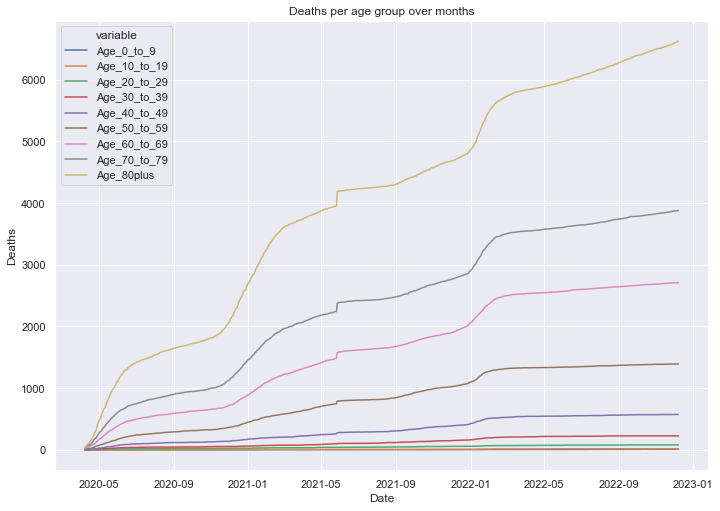

In [7]:
fg = sns.lineplot(x = 'DATE', y = 'value', hue='variable', data = pd.melt(death_data_set, 'DATE'))
fg.set(xlabel ="Date", ylabel = "Deaths", title ='Deaths per age group over months')
sns.set(rc={'figure.figsize':(11.7,8.27)})
fg

Analysis:

We can see here a clear correlation between the age of people who got sick and the rate of deaths for that age group. As we go from younger to older age groups, more people are confirmed as having died from COVID-19.

Since we have the cumulative data of cases per age group and deaths per age group I think it would be worth while to find the average cases per year and average deaths per year of each age group and make an ANOVA test based on that.

Hypothesis test and ANOVA test:

We want to do a hypothesis test on whether or not there is a statistical significance between the 2 graphs. The Null hypothesis that I will propose is that there is no statistical significance between the averages of the 2 graphs. The Alternative hypothesis that I propose is that there is a large enough statistical significance between the averages of the 2 graphs to warrant attention.

In [106]:
# normalizing data for anova test
for index in range(len(cases_data_set) - 1, -1, -1):
    if index > 0:
        cases_data_set.iat[index, 1] = cases_data_set.iat[index, 1] - cases_data_set.iat[index - 1, 1]
        cases_data_set.iat[index, 2] = cases_data_set.iat[index, 2] - cases_data_set.iat[index - 1, 2]
        cases_data_set.iat[index, 3] = cases_data_set.iat[index, 3] - cases_data_set.iat[index - 1, 3]
        cases_data_set.iat[index, 4] = cases_data_set.iat[index, 4] - cases_data_set.iat[index - 1, 4]
        cases_data_set.iat[index, 5] = cases_data_set.iat[index, 5] - cases_data_set.iat[index - 1, 5]
        cases_data_set.iat[index, 6] = cases_data_set.iat[index, 6] - cases_data_set.iat[index - 1, 6]
        cases_data_set.iat[index, 7] = cases_data_set.iat[index, 7] - cases_data_set.iat[index - 1, 7]
        cases_data_set.iat[index, 8] = cases_data_set.iat[index, 8] - cases_data_set.iat[index - 1, 8]
        cases_data_set.iat[index, 9] = cases_data_set.iat[index, 9] - cases_data_set.iat[index - 1, 9]
cases_data_set.head()

,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus
0,2020-04-08 00:00:00,27,109,625,968,1015,1135,833,550,267
1,2020-04-09 00:00:00,6,18,76,108,130,147,80,50,41
2,2020-04-10 00:00:00,3,19,71,129,136,139,138,85,63
3,2020-04-11 00:00:00,9,16,83,112,132,144,90,72,68
4,2020-04-12 00:00:00,7,10,51,73,91,110,71,59,59


In [105]:
# normalizing data for anova test
for index in range(len(death_data_set) - 1, -1, -1):
    if index > 0:
        death_data_set.iat[index, 1] = death_data_set.iat[index, 1] - death_data_set.iat[index - 1, 1]
        death_data_set.iat[index, 2] = death_data_set.iat[index, 2] - death_data_set.iat[index - 1, 2]
        death_data_set.iat[index, 3] = death_data_set.iat[index, 3] - death_data_set.iat[index - 1, 3]
        death_data_set.iat[index, 4] = death_data_set.iat[index, 4] - death_data_set.iat[index - 1, 4]
        death_data_set.iat[index, 5] = death_data_set.iat[index, 5] - death_data_set.iat[index - 1, 5]
        death_data_set.iat[index, 6] = death_data_set.iat[index, 6] - death_data_set.iat[index - 1, 6]
        death_data_set.iat[index, 7] = death_data_set.iat[index, 7] - death_data_set.iat[index - 1, 7]
        death_data_set.iat[index, 8] = death_data_set.iat[index, 8] - death_data_set.iat[index - 1, 8]
        death_data_set.iat[index, 9] = death_data_set.iat[index, 9] - death_data_set.iat[index - 1, 9]
death_data_set.head()

,DATE,Age_0_to_9,Age_10_to_19,Age_20_to_29,Age_30_to_39,Age_40_to_49,Age_50_to_59,Age_60_to_69,Age_70_to_79,Age_80plus
0,2020-04-08 00:00:00,0.0,0.0,0.0,4.0,4.0,16.0,26.0,39.0,35.0
1,2020-04-09 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,8.0
2,2020-04-10 00:00:00,0.0,0.0,0.0,1.0,1.0,4.0,4.0,8.0,15.0
3,2020-04-11 00:00:00,0.0,0.0,1.0,3.0,0.0,2.0,10.0,6.0,13.0
4,2020-04-12 00:00:00,0.0,0.0,0.0,1.0,0.0,3.0,9.0,8.0,8.0


Result:



In [10]:
cases_statistics = f_oneway(cases_data_set.loc[:,'Age_0_to_9'],cases_data_set.loc[:,'Age_10_to_19'],cases_data_set.loc[:,'Age_20_to_29'],
        cases_data_set.loc[:,'Age_30_to_39'],cases_data_set.loc[:,'Age_40_to_49'],cases_data_set.loc[:,'Age_50_to_59'],
        cases_data_set.loc[:,'Age_60_to_69'],cases_data_set.loc[:,'Age_70_to_79'],cases_data_set.loc[:,'Age_80plus'])
cases_statistics

F_onewayResult(statistic=47.7852780283567, pvalue=6.387122343474321e-76)

In [11]:
death_statistics = f_oneway(death_data_set.loc[:,'Age_0_to_9'],death_data_set.loc[:,'Age_10_to_19'],death_data_set.loc[:,'Age_20_to_29'],
        death_data_set.loc[:,'Age_30_to_39'],death_data_set.loc[:,'Age_40_to_49'],death_data_set.loc[:,'Age_50_to_59'],
        death_data_set.loc[:,'Age_60_to_69'],death_data_set.loc[:,'Age_70_to_79'],death_data_set.loc[:,'Age_80plus'])
death_statistics

F_onewayResult(statistic=242.5002691845533, pvalue=0.0)

Conclusion:

When the p-value of our anova test is less than α = .05, we can reject our null hypothesis and can conclude that there is a statistically significant difference between the means of the 10 groups that we are using as our samples.

Because of this statistical significance between the means of our groups in both data sets, we can confidently say that there is a correlation between age groups and cases as well as age groups and deaths.

Linear Regression Model of Cases:

To make this even more useful, what we can do is make a linear regression model for the cases of each age group that will show us the likelyhood of how many cases there will be on any given day.

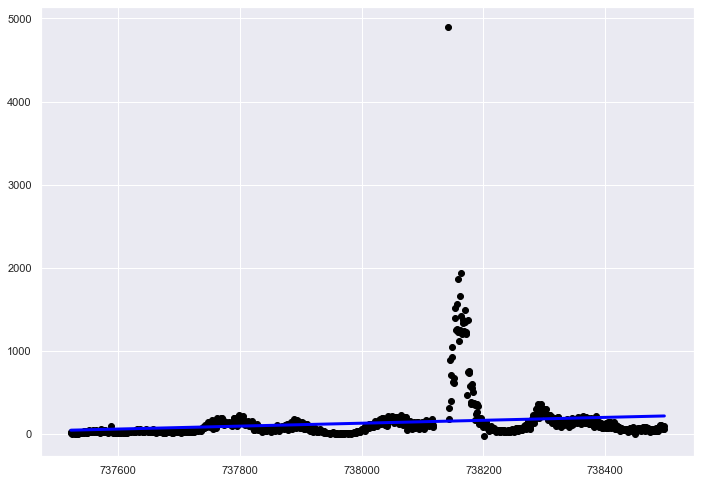

coefficient of determination: 0.03468869059558233
intercept: [-129527.14240447]
slope: [[0.17568619]]


In [102]:
y = numpy.array(cases_data_set['Age_0_to_9']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

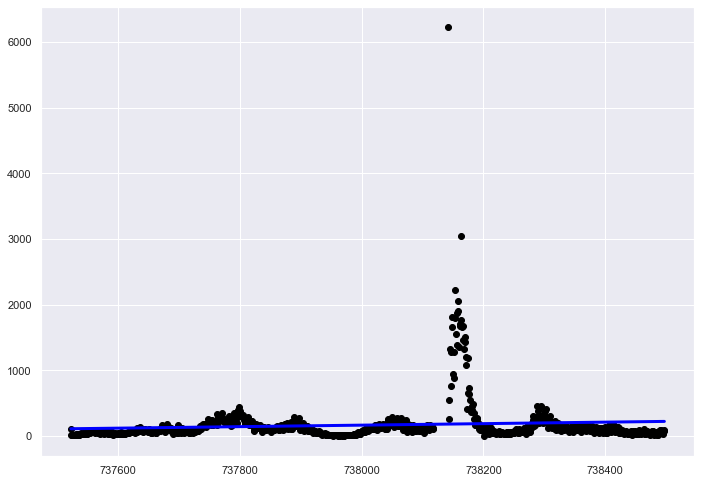

coefficient of determination: 0.009419549018168771
intercept: [-84478.45811586]
slope: [[0.11468925]]


In [78]:
y = numpy.array(cases_data_set['Age_10_to_19']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

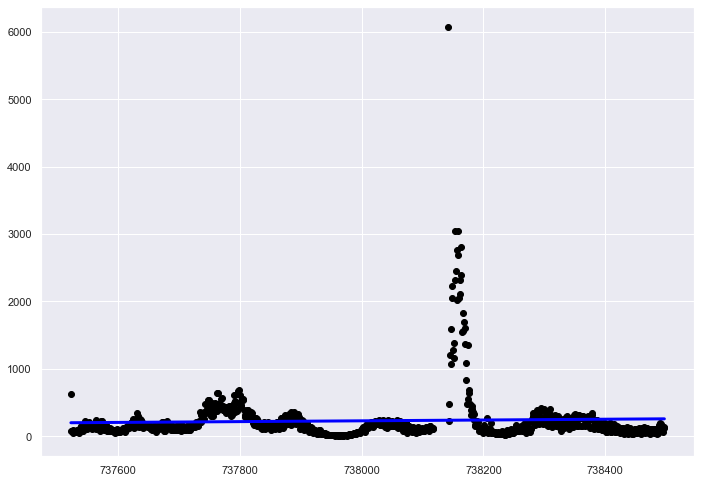

coefficient of determination: 0.0019093083927670396
intercept: [-43612.13741768]
slope: [[0.05940171]]


In [79]:
y = numpy.array(cases_data_set['Age_20_to_29']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

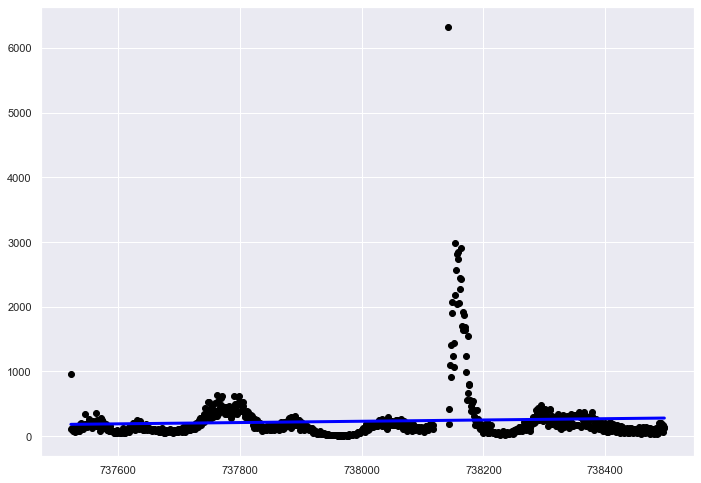

coefficient of determination: 0.005153007413314814
intercept: [-73308.37200948]
slope: [[0.09964516]]


In [80]:
y = numpy.array(cases_data_set['Age_30_to_39']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

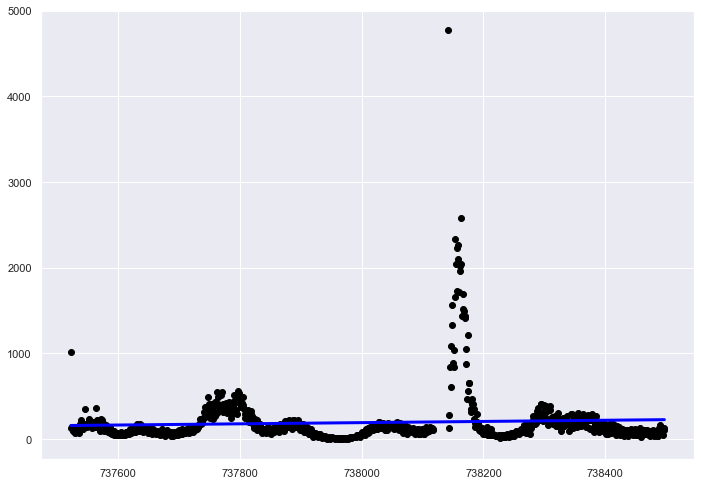

coefficient of determination: 0.00391322088878443
intercept: [-51262.53007601]
slope: [[0.06972087]]


In [81]:
y = numpy.array(cases_data_set['Age_40_to_49']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

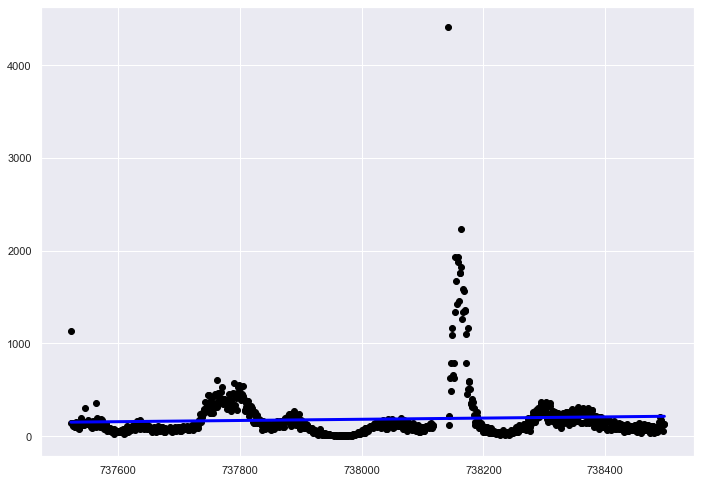

coefficient of determination: 0.004218541507051143
intercept: [-47509.15056593]
slope: [[0.06462317]]


In [82]:
y = numpy.array(cases_data_set['Age_50_to_59']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

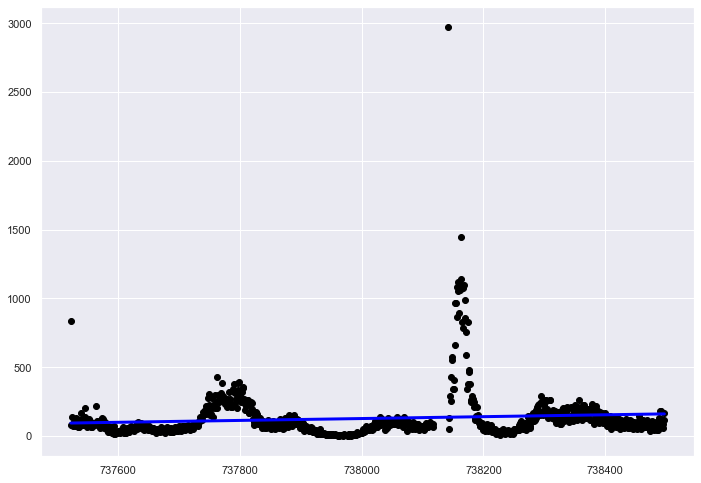

coefficient of determination: 0.011703987735044108
intercept: [-50176.95408472]
slope: [[0.06816227]]


In [83]:
y = numpy.array(cases_data_set['Age_60_to_69']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

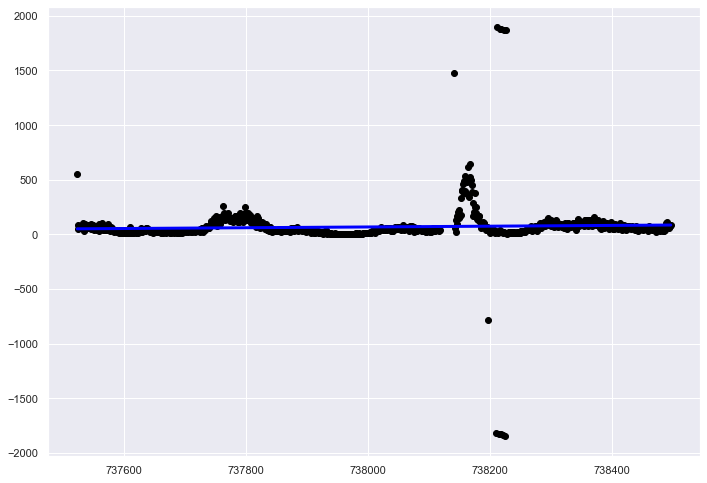

coefficient of determination: 0.0022662121551543235
intercept: [-26025.8660527]
slope: [[0.03535717]]


In [84]:
y = numpy.array(cases_data_set['Age_70_to_79']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

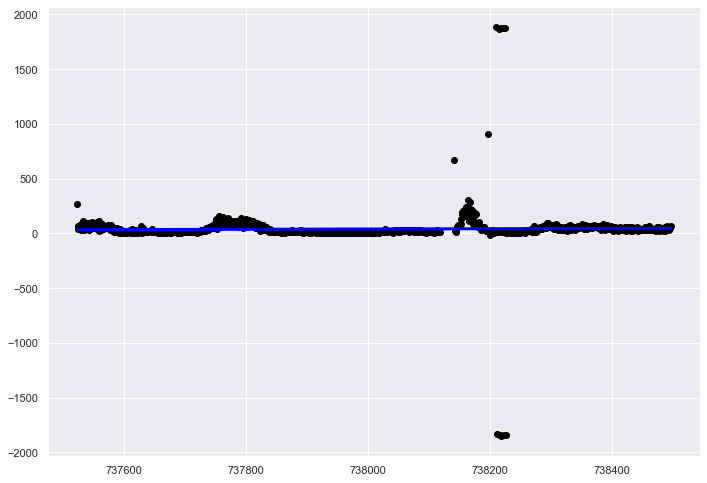

coefficient of determination: 0.00036340501417753135
intercept: [-9727.22108802]
slope: [[0.01323474]]


In [85]:
y = numpy.array(cases_data_set['Age_80plus']).reshape(-1,1)
new_dates = pd.to_datetime(cases_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

Linear Regression Model of Deaths:

To make this even more useful, what we can do is make a linear regression model of the deaths of each age group that will show us the likelyhood of how many deaths there will be on any given day.

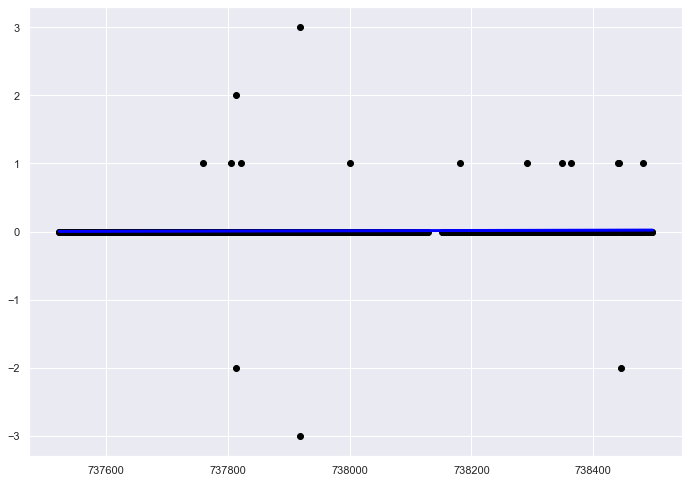

coefficient of determination: 0.0006299646025459404
intercept: [-14.73982855]
slope: [[1.99873628e-05]]


In [86]:
y = numpy.array(death_data_set['Age_0_to_9']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

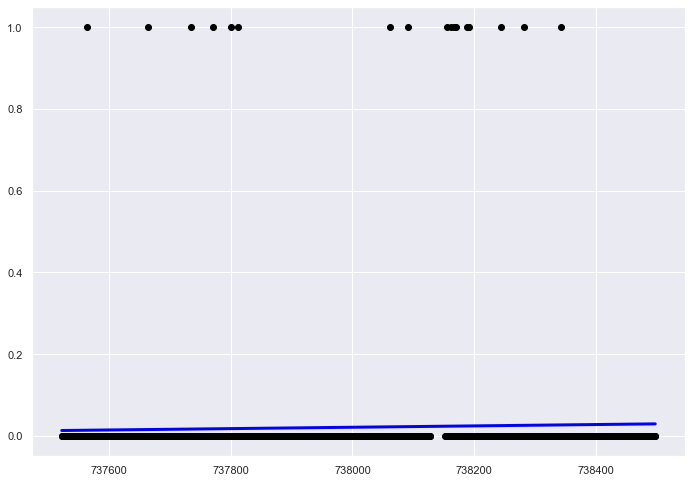

coefficient of determination: 0.0010174281776805794
intercept: [-12.28496203]
slope: [[1.66748343e-05]]


In [87]:
y = numpy.array(death_data_set['Age_10_to_19']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

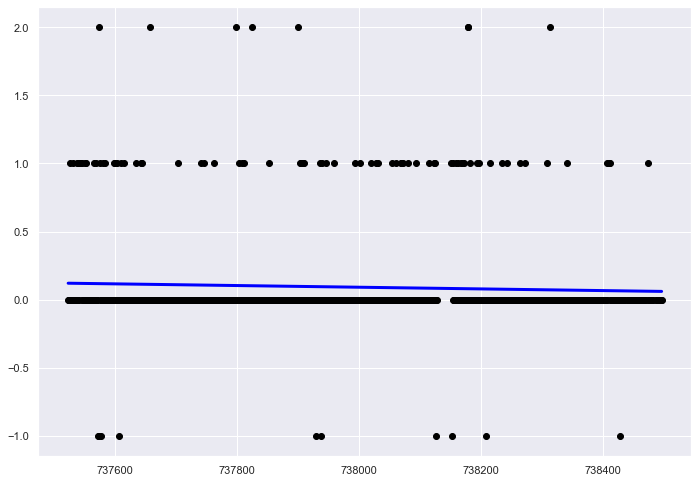

coefficient of determination: 0.0022407773302679512
intercept: [45.6035115]
slope: [[-6.16698937e-05]]


In [88]:
y = numpy.array(death_data_set['Age_20_to_29']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

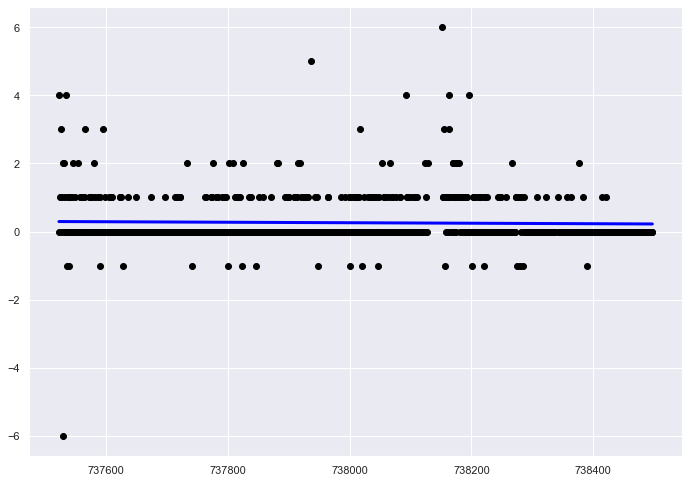

coefficient of determination: 0.0007645641277367332
intercept: [53.79334056]
slope: [[-7.25410064e-05]]


In [89]:
y = numpy.array(death_data_set['Age_30_to_39']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

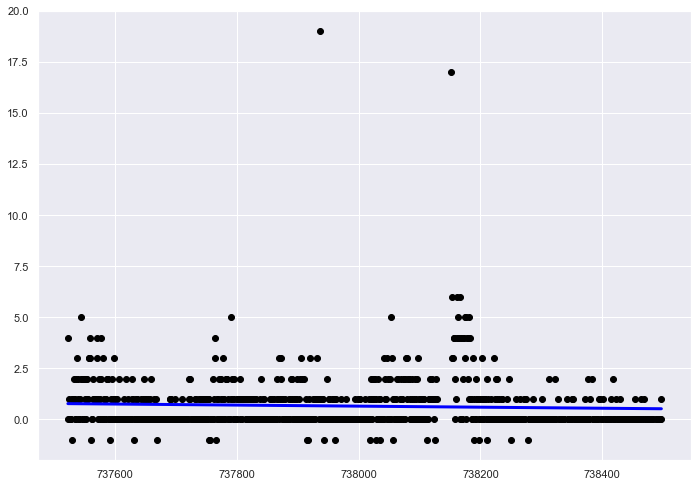

coefficient of determination: 0.00268475086629294
intercept: [190.53330339]
slope: [[-0.00025729]]


In [90]:
y = numpy.array(death_data_set['Age_40_to_49']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

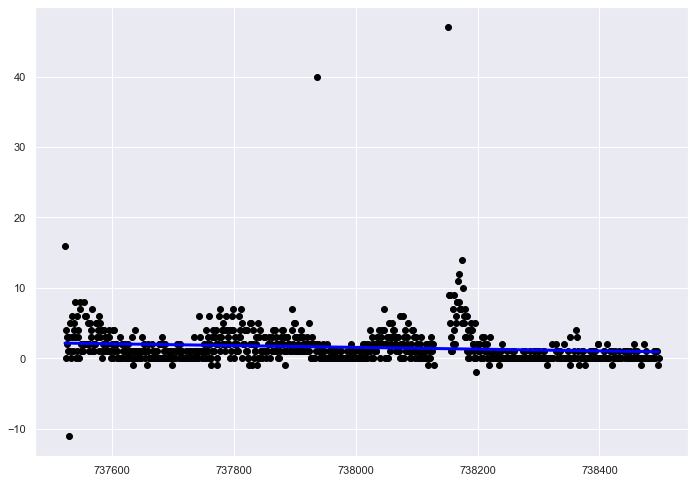

coefficient of determination: 0.014487674317545607
intercept: [934.30550633]
slope: [[-0.00126388]]


In [91]:
y = numpy.array(death_data_set['Age_50_to_59']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

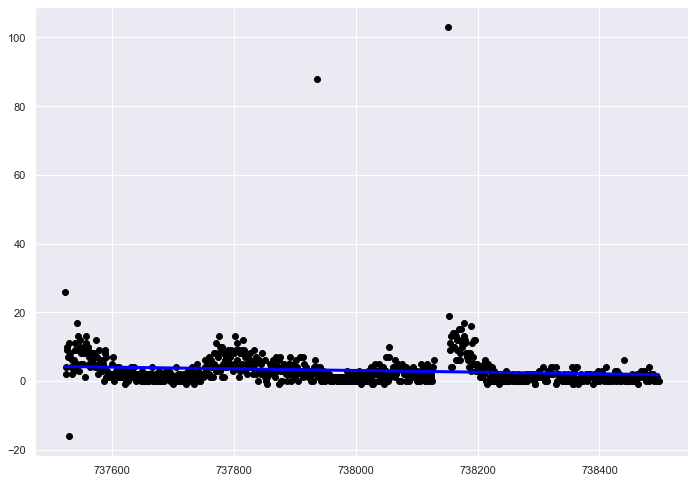

coefficient of determination: 0.014326998508597644
intercept: [1802.94139354]
slope: [[-0.00243889]]


In [92]:
y = numpy.array(death_data_set['Age_60_to_69']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

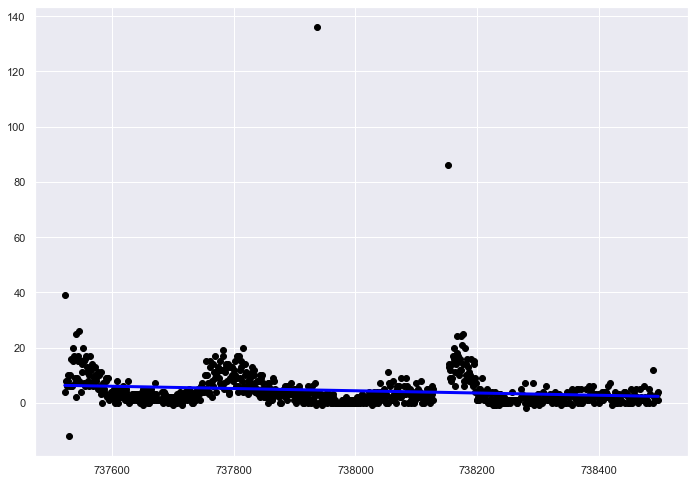

coefficient of determination: 0.024684040694178178
intercept: [3014.18798231]
slope: [[-0.00407839]]


In [93]:
y = numpy.array(death_data_set['Age_70_to_79']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

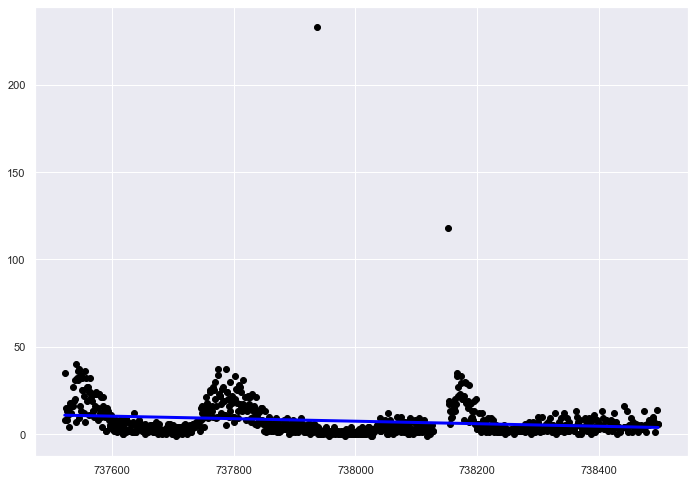

coefficient of determination: 0.029409648772651065
intercept: [5337.38005172]
slope: [[-0.0072222]]


In [94]:
y = numpy.array(death_data_set['Age_80plus']).reshape(-1,1)
new_dates = pd.to_datetime(death_data_set['DATE'])
new_dates = new_dates.map(datetime.toordinal)
x = numpy.array(new_dates).reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="black")
plt.plot(x, y_pred, color="blue", linewidth=3)


plt.xticks()
plt.yticks()

plt.show()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

Conclusion:

From the Linear Regression models we can see that the cases per age group are increasing as time goes on, while the deaths per age group are decreasing as time goes on. This can be attributed to many things, including more tests being available for people around the world, over the counter medicine that is now available for COVID-19 prevention, and more 